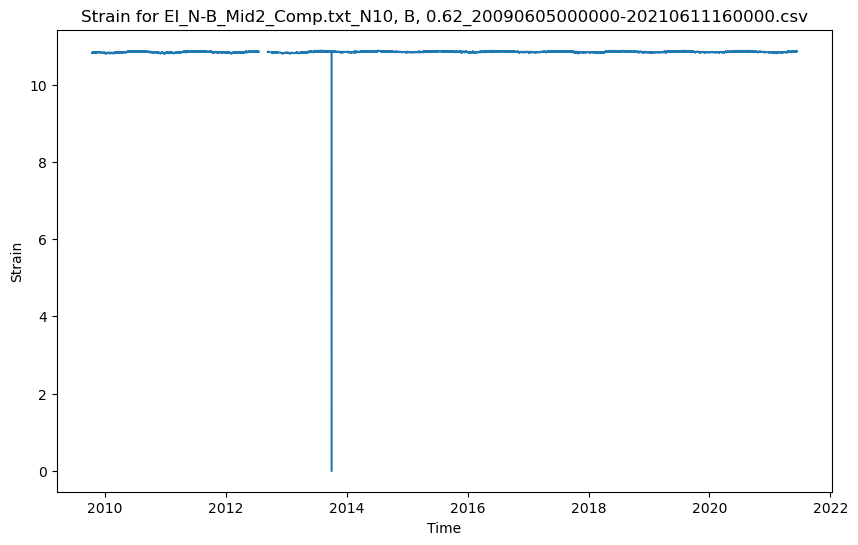

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

folder = 'strain_csv/'
file = 'EI_N-B_Mid2_Comp.txt_N10, B, 0.62_20090605000000-20210611160000.csv'
# file = 'EI_N-B_Far_Comp.txt_N13, B, 12.64_comp_20090605000000-20210611160000.csv'

df = pd.read_csv(folder + file, parse_dates=['Time'])

# #Choose start and end time (start '2009-06-05 00:00:00', end '2021-06-11 16:00:00')
# start_time = '2013-06-03 08:00:00'
# end_time = '2021-06-11 16:00:00'

# df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [93]:
#Find values of strain that are exactly zero
df_zero = df[df["Strain"] == 0]
print(df_zero)

          Time_index                Time  Strain
8579  20131001080000 2013-10-01 08:00:00     0.0


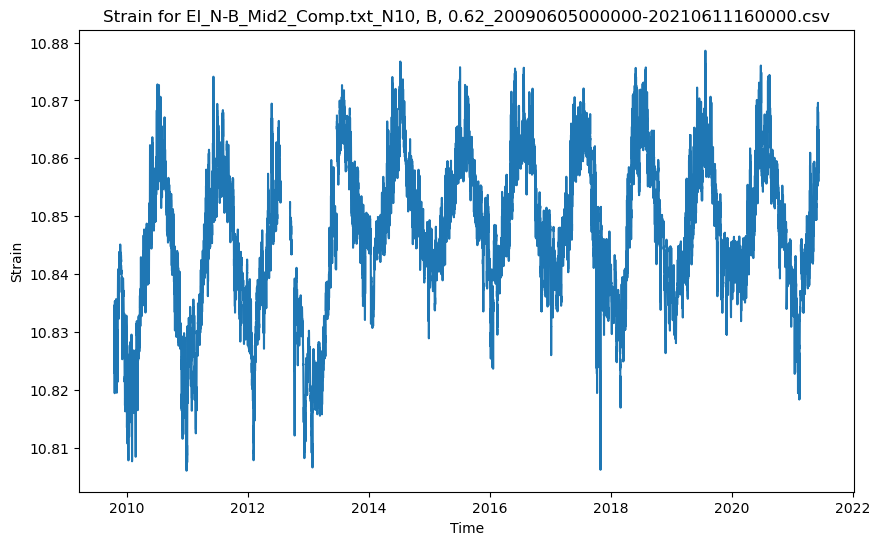

In [94]:
#Remove rows with strain values of zero and plot
indices_to_remove = df_zero.index
df = df.drop(index=indices_to_remove)
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [95]:
df.describe()

,Time_index,Time,Strain
count,2.531100e+04,25311,24310.000000
mean,2.015188e+13,2015-08-14 16:36:14.422187776,10.846869
min,2.009060e+13,2009-06-05 00:00:00,10.806010
25%,2.012091e+13,2012-09-14 02:00:00,10.838720
50%,2.015082e+13,2015-08-18 16:00:00,10.847460
75%,2.018072e+13,2018-07-15 02:00:00,10.856900
max,2.021061e+13,2021-06-11 16:00:00,10.878600
std,3.379881e+10,NaN,0.012733


In [96]:
#Count the number of NaN values in each column
df.isna().sum()

Time_index       0
Time             0
Strain        1001
dtype: int64

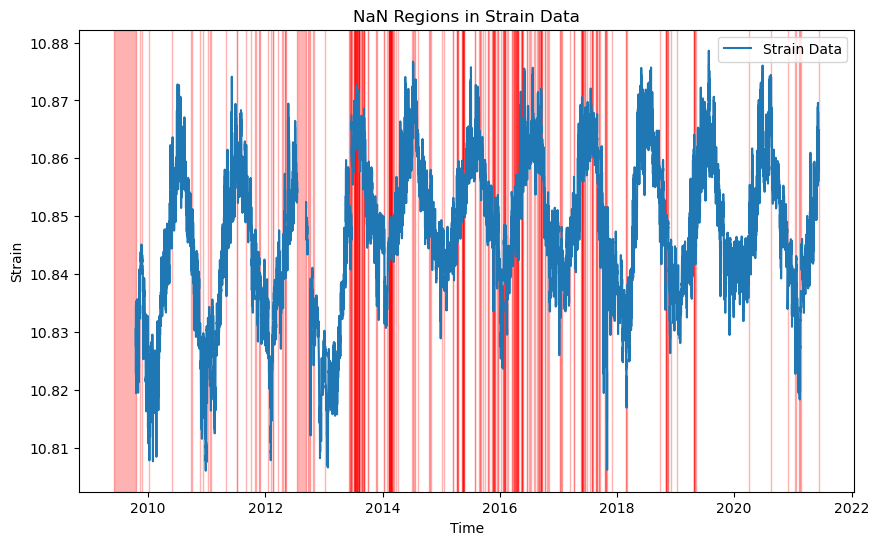

In [97]:
import numpy as np

# Identify NaN regions
df['is_nan'] = df['Strain'].isna()  # Create a boolean column for NaNs

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

# Shade regions with NaNs
start_time = None
for i in range(len(df)):
    if df['is_nan'].iloc[i] and start_time is None:  # Start of NaN region
        start_time = df['Time'].iloc[i]
    elif not df['is_nan'].iloc[i] and start_time is not None:  # End of NaN region
        end_time = df['Time'].iloc[i]
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)  # Shade NaN region
        start_time = None

# Handle if NaNs end at the last row
if start_time is not None:
    plt.axvspan(start_time, df['Time'].iloc[-1], color='red', alpha=0.3)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title('NaN Regions in Strain Data')
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Box Plot of Strain')

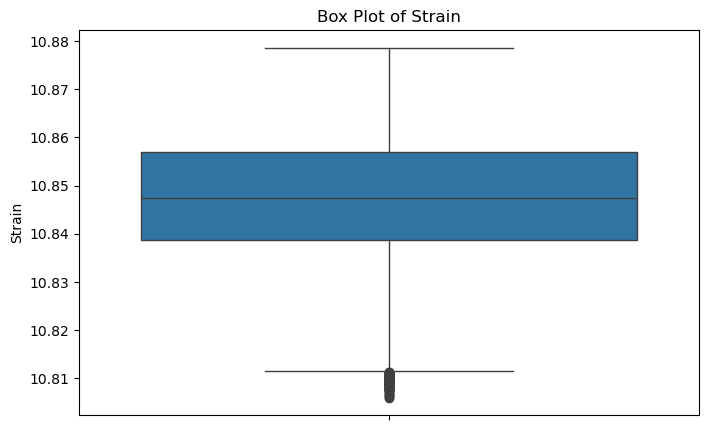

In [98]:
#Boxplot of strain values
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Strain'])

plt.ylabel('Strain')
plt.title(f'Box Plot of Strain')

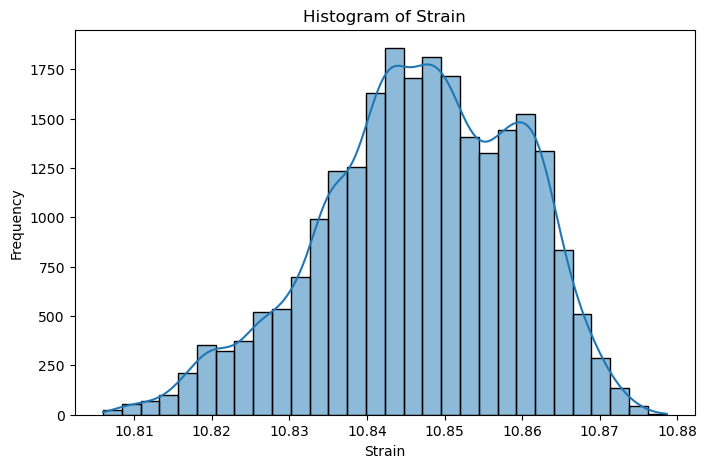

In [99]:
# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Strain'], bins=30, kde=True)  # kde=True adds a density curve

# Labels and title
plt.xlabel('Strain')
plt.ylabel('Frequency')
plt.title('Histogram of Strain')

# Show plot
plt.show()